# Lab 2 Sample Code

In [136]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """ Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))

def der_sigmoid(y):
    """ First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)

class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """ Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data = np.random.uniform(0, 1, (n, 2))

        inputs = []
        labels = []

        for point in data:
            inputs.append([point[0], point[1]])

            if point[0] > point[1]:
                labels.append(0)
            else:
                labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """ Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def fetch_data(mode, n):
        """ Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == 'Linear' or mode == 'XOR'

        data_gen_func = {
            'Linear': GenData._gen_linear,
            'XOR': GenData._gen_xor
        }[mode]

        return data_gen_func(n)

class SimpleNet:
    def __init__(self, num_step=2000, print_interval=100, learning_rate=1e-2):
        """ A hand-crafted implementation of simple network.

        Args:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        self.num_step = num_step
        self.print_interval = print_interval
        self.learning_rate = learning_rate
        # Model parameters initialization
        # hidden layer 1: 100 nodes
        # hidden layer 2: 10 nodes
        # Please initiate your network parameters here.
        # 設定初始權重, 
        self.hidden1_weights = np.random.normal(0, 1, 2 * 100).reshape(2, 100)
        self.bias1 = np.random.uniform(size=(1,100))
        self.hidden2_weights = np.random.normal(0, 1, 100 * 10).reshape(100, 10)
        self.bias2 = np.random.uniform(size=(1,10))
        self.hidden3_weights = np.random.normal(0, 1, 10 * 1).reshape(10, 1)
        self.bias3 = np.random.uniform(size=(1,1))

        self.a0 = np.zeros((1, 2))
        self.z1 = np.zeros((1, 100))  
        self.a1 = np.zeros((1, 100))
        self.z2 = np.zeros((1, 10))  
        self.a2 = np.zeros((1, 10))
        self.z3 = np.zeros((1, 1))  
        self.a3 = np.zeros((1, 1))
        # use momentum to update gradient
        self.v = 0

    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """ Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0]
        assert data.shape[0] == pred_y.shape[0]

        plt.figure()

        plt.subplot(1, 2, 1)
        plt.title('Ground Truth', fontsize=18)

        for idx in range(data.shape[0]):
            if gt_y[idx] == 0:
                plt.plot(data[idx][0], data[idx][1], 'ro')
            else:
                plt.plot(data[idx][0], data[idx][1], 'bo')

        plt.subplot(1, 2, 2)
        plt.title('Prediction', fontsize=18)

        for idx in range(data.shape[0]):
            if pred_y[idx] == 0:
                plt.plot(data[idx][0], data[idx][1], 'ro')
            else:
                plt.plot(data[idx][0], data[idx][1], 'bo')

        plt.show()

    def forward(self, inputs):
        """ Implementation of the forward pass.
        It should accepts the inputs and passing them through the network and return results.
        """
        """ FILL IN HERE """
        # forward prop
        # a_i+1 = sigmoid(a_i * weight + bias) record every step for back prop
        self.a0 = inputs
        self.z1 = np.array(self.a0).dot(self.hidden1_weights) + self.bias1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.array(self.a1).dot(self.hidden2_weights) + self.bias2
        self.a2 = sigmoid(self.z2)
        self.z3 = np.array(self.a2).dot(self.hidden3_weights) + self.bias3
        self.a3 = sigmoid(self.z3)

        return self.a3

    def backward(self):
        """ Implementation of the backward pass.
        It should utilize the saved loss to compute gradients and update the network all the way to the front.
        """
        # learning rate 應該根據model做調整, 所以不用固定的
        # learning_rate=1e-2
        """ FILL IN HERE """
        #back prop with error = output - label
        d_z3 = d_b3 = self.error * der_sigmoid(self.a3) #(1, 1)
        d_w3 = np.array(self.a2.T).dot(d_z3) #(10, 1)
        d_a2 = np.array(d_z3).dot(self.hidden3_weights.T) #(1, 10)
        
        d_z2 = d_b2 = der_sigmoid(self.a2) * d_a2 #(1, 10)
        d_w2 = np.array(self.a1.T).dot(d_z2) #(100, 10)
        d_a1 = np.array(d_z2).dot(self.hidden2_weights.T) #(1, 100)

        d_z1 = d_b1 = der_sigmoid(self.a1) * d_a1 #(1, 100)
        d_w1 = np.array(self.a0.T).dot(d_z1) #(2, 100)
        #d_a0 = np.array(d_z1).dot(self.hidden1_weights.T)
        
        #Adagrad
        Adagrad = lambda lr, grad: lr * 1/np.sqrt(np.sum(grad * grad) + 1e-8) * grad
        self.hidden3_weights -= Adagrad(self.learning_rate, d_w3)
        self.hidden2_weights -= Adagrad(self.learning_rate, d_w2)
        self.hidden1_weights -= Adagrad(self.learning_rate, d_w1)
        self.bias3 -= Adagrad(self.learning_rate, d_b3)
        self.bias2 -= Adagrad(self.learning_rate, d_b2)
        self.bias1 -= Adagrad(self.learning_rate, d_b1)
        '''
        #SGD
        self.hidden3_weights -= self.learning_rate * d_w3
        self.hidden2_weights -= self.learning_rate * d_w2
        self.hidden1_weights -= self.learning_rate * d_w1
        self.bias3 -= self.learning_rate * d_b3
        self.bias2 -= self.learning_rate * d_b2
        self.bias1 -= self.learning_rate * d_b1
        '''
        
    def train(self, inputs, labels):
        """ The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epochs in range(self.num_step):
            for idx in range(n):
                # operation in each training step:
                #   1. forward passing
                #   2. compute loss
                #   3. propagate gradient backward to the front
                self.output = self.forward(inputs[idx:idx+1, :])
                self.error = self.output - labels[idx:idx+1, :]
                """ apply your backward function: """
                """ FILL IN HERE """
                self.backward()
                
            if epochs % self.print_interval == 0:
                print('Epochs {}: '.format(epochs))
                self.test(inputs, labels)

        print('Training finished')
        self.test(inputs, labels)

    def test(self, inputs, labels):
        """ The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx:idx+1, :])
            error += abs(result - labels[idx:idx+1, :])

        error /= n

        """ Print or plot your results in your preferred forms"""
        print('accuracy: %.2f' % ((1 - error)*100) + '%')
        
        """ FILL IN HERE """
        # print('')

### Run "Linear"

Epochs 0: 
accuracy: 53.66%
Epochs 2000: 
accuracy: 100.00%
Epochs 4000: 
accuracy: 100.00%
Training finished
accuracy: 100.00%


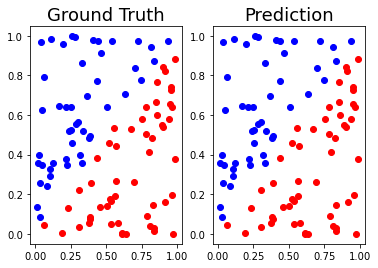

' FILL IN HERE '

In [140]:
""" Customize your own code if needed """

data, label = GenData.fetch_data('Linear', 100)
net = SimpleNet(num_step=6000, print_interval=2000, learning_rate=0.025)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

""" FILL IN HERE """

### Run "XOR"

Epochs 0: 
accuracy: 50.85%
Epochs 20000: 
accuracy: 97.94%
Epochs 40000: 
accuracy: 100.00%
Training finished
accuracy: 100.00%


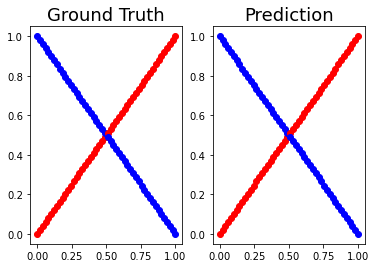

' FILL IN HERE '

In [138]:
""" Customize your own code if needed """

data, label = GenData.fetch_data('XOR', 100)

net = SimpleNet(num_step=60000, print_interval=20000, learning_rate=0.05)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

""" FILL IN HERE """

Procedures
1) 初始化權重: 
用np.random.rand來初始權重: 結果的accuracy幾乎不會變(50%左右)，也害我一直以為自己back prop寫錯了，重寫了很多次
用np.random.uniform來初始bias: 以平均的方式來設定bias，符合兩題的邏輯
用np.random.normal來初始權重: 以常態分佈來設定權重能讓開始的權重分配更符合實際情形，使訓練結果更快速的進步。

2) forward propagation
把sigmoid前後的結果分別紀錄下來，方便back prop時使用，不斷傳遞結果求得output

3) back propagation
dz = dE/da * da/dz = error * der_sigmoid 
db = d(wa + b)/db * dz = 1 * dz
dw = d(wa + b)/dw * dz = a * dz
da = d(wa + b)/dw * dz = w * dz

4) learning rate調整
採用Adagrad的方式更新linear的weight
lr = lr * 1/np.sqrt(np.sum(grad * grad) + epsilon) * grad
採用SGD的方式來更新Xor的lr

Discussion
1) 錯誤的初始化weight: 一開始的weight跟bias的設計使我浪費許多時間，他也讓我學到了一課，錯誤的初始化會造成成功率永遠上不去，這是我一開始並不是那麼清楚的
2) learning rate的設計: 不同的調整lr的演算法，或是不一樣的初始lr對我們最後的結果及收斂速度都有很大的影響，在linear中我設置lr = 0.025並使用Adagrad的方式來更新lr, 而xor中我們則設置lr = 0.05並使用Adagrad的方式更新lr, 在這兩種情況下accuracy有望可達到100% 

心得
感覺這次寫得特別累，不過也學到了非常多東西，感覺很充實，作業讓我去好好複習之前老師教過的back prop的運算過程，以及很多關於神經網路的知識，使我獲益良多，而且藉由不斷的去訓練，更改code內容來提升正確率，我也學會了許多coding的知識，非常謝謝本次的作業。